In [ ]:
import pandas as pd;

In [ ]:
# from urllib.request import urlretrieve
# medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
# urlretrieve(medical_charges_url, 'medical.csv')
# print('Radha');

In [ ]:
medical_df = pd.read_csv('medical.csv')
medical_df

In [ ]:
medical_df.isnull().sum()

In [ ]:
medical_df.describe()

In [ ]:
import plotly.express as px;
import matplotlib
import matplotlib.pyplot as plt;
import seaborn as sns;

In [ ]:
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
medical_df['age'].describe()

**age analysis**

In [ ]:
fig = px.histogram(medical_df , x = 'age', marginal='box' , nbins = 47, title='Age Distribution')
fig.update_layout(bargap=0.1);
fig.show()

**bmi**

looking like normal or gaussian distrubution data is centered around mean and decreasing away from mean

In [ ]:
fig = px.histogram(medical_df , x='bmi', marginal='box', color_discrete_sequence=['red'], title='bmi distribution')
fig.update_layout(bargap=0.1);
fig.show()

In [ ]:
fig = px.histogram(medical_df , x='charges' ,color='smoker', marginal='box', title='annual charges distribution', color_discrete_sequence=['red' , 'black']);
fig.update_layout(bargap=0.1);
fig.show()

In [ ]:
fig = px.histogram(medical_df , x='charges' ,color='sex', marginal='box', title='annual charges distribution', color_discrete_sequence=['red' , 'black']);
fig.update_layout(bargap=0.1);
fig.show()

In [ ]:
medical_df['region'].value_counts()

In [ ]:
fig = px.histogram(medical_df , x='charges' ,color='region', marginal='box', title='annual charges distribution', color_discrete_sequence=['red' , 'black', 'blue' , 'green']);
fig.update_layout(bargap=0.1);
fig.show()

In [ ]:
fig = px.histogram(medical_df , x='region' , marginal='box', title='region distribution', color_discrete_sequence=['violet']);
fig.update_layout(bargap=0.1);
fig.show()

In [ ]:
medical_df['smoker'].value_counts()

In [ ]:
fig = px.histogram(medical_df , x='smoker', color='sex', title='smoker')
fig.update_layout(bargap=0.1);
fig.show()

In [ ]:
medical_df

In [ ]:
fig = px.histogram(medical_df ,marginal='box', x='charges', color='children')
fig.update_layout(bargap=0.1);
fig.show()

**age and charges**

In [ ]:
fig = px.scatter(medical_df , x='age', y='charges', color='smoker',opacity=0.8,hover_data=['sex'], title='age vs charges')
fig.update_traces(marker_size=5)
fig.show()

**bmi and charges**

In [ ]:
fig = px.scatter(medical_df , x='bmi', y='charges', color='smoker', color_discrete_sequence=['red' , 'black'] ,opacity=0.8,hover_data=['sex'], title='bmi vs charges')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
px.violin(medical_df , x='children', y='charges')


### **correlation coefficient**

In [ ]:
print(medical_df.charges.corr(medical_df.age))
print(medical_df['charges'].corr(medical_df['age']))
print(medical_df['age'].corr(medical_df['charges']))

In [ ]:
print(medical_df['charges'].corr(medical_df['bmi']))
print(medical_df['charges'].corr(medical_df['children']))

In [ ]:
smoker_values = {'yes': 1, 'no': 0}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df['smoker_numeric'] = smoker_numeric
medical_df

In [ ]:
print(medical_df.charges.corr(medical_df.smoker_numeric))

In [ ]:
medical_df.select_dtypes(include=['int64', 'float64']).corr()

Text(0.5, 1.0, 'Correlation Heatmap')

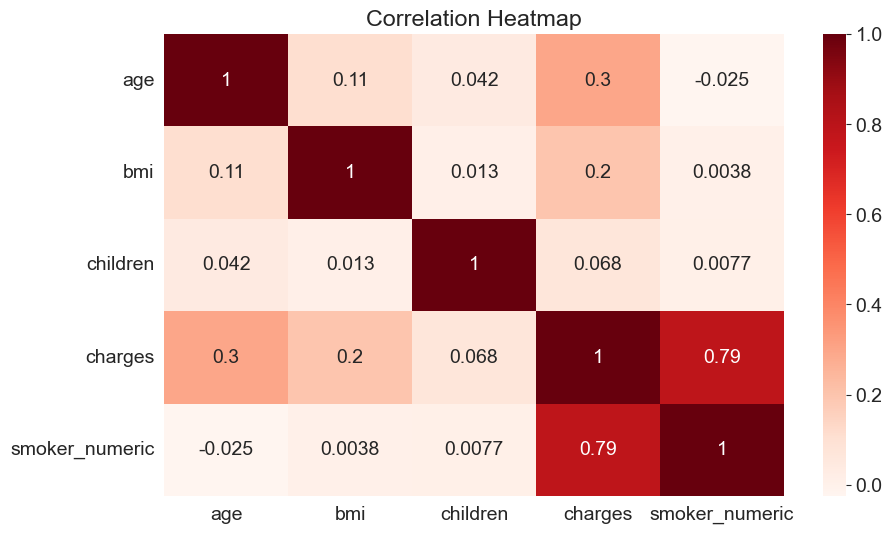

In [138]:
sns.heatmap(medical_df.select_dtypes(include=['int64', 'float64']).corr() , cmap='Reds' , annot=True)
plt.savefig(fname='heatmap.png')
plt.title('Correlation Heatmap')